In [2]:
import numpy as np
from scipy.sparse import lil_matrix, save_npz, load_npz
from multiprocessing import Pool, Manager, Value
from tqdm import tqdm

import os
import sys
sys.path.append('../..')
sys.path.append('../../RecStudio')
import pickle
import numpy as np
from data.MIND.process import MINDSeqDataset
from dataset import CTRDataset
from typing import Dict
import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer
from sentence_transformers.util import cos_sim
from collections import defaultdict
import math

BATCH_SIZE = 256
MAX_LEN = 256 #512
MODEL_ID = '../../mxbai-embed-large-v1'

/data1/home/xingmei/.conda/envs/rec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Grocery_and_Gourmet_Food

## Select

In [4]:
category = 'Grocery_and_Gourmet_Food'
# ----------------------------------------Filter pairs-----------------------------------------------
if not 'co_occurrence' in locals().keys():
    co_occurrence = load_npz(f'co_occurrence/{category}.npz')
    co_occurrence = co_occurrence.tocoo()
if not 'sim' in locals().keys():
    sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

In [ ]:
len(sim) # 88,601,340
len([_ for _ in sim if _ > 0.65]) # 4,767,776
len([_ for _ in sim if _ > 0.8]) # 414,030
len([_ for _ in sim if _ > 0.9]) # 82,072

In [ ]:
len([_ for _ in co_occurrence.data if _ > 0.1]) # 6,411,474
len([_ for _ in co_occurrence.data if _ > 0.3]) # 40,732
len([_ for _ in co_occurrence.data if _ > 0.5]) # 904
len([_ for k, _ in enumerate(co_occurrence.data) if _ > 0.3 and \
                                                (co_occurrence.row[k] != co_occurrence.col[k])]) # 40,732

In [27]:
COS_SIM_THRESHOLD = 0.9

pairs_9 = set()
for i in tqdm(range(len(sim))):
    if  sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_9 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_9.add((co_occurrence.row[i], co_occurrence.col[i]))

print(f"Length of pairs: {len(pairs_9)}")

100%|██████████| 88601340/88601340 [00:27<00:00, 3276150.78it/s]

Length of pairs: 41036


In [12]:
CO_OCCURENCE_THRESHOLD = 0.3
COS_SIM_THRESHOLD = 0.7

pairs_37 = []
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_37 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_37.append((co_occurrence.row[i], co_occurrence.col[i]))

print(f"Length of pairs: {len(pairs_37)}")

with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_37, f)

100%|██████████| 88601340/88601340 [00:27<00:00, 3215902.97it/s]

Length of pairs: 2719


In [14]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.8

pairs_28 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_28 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_28.add((co_occurrence.row[i], co_occurrence.col[i]))

print(f"Length of pairs: {len(pairs_28)}")

100%|██████████| 88601340/88601340 [00:27<00:00, 3183431.99it/s]

Length of pairs: 5207


In [17]:
CO_OCCURENCE_THRESHOLD = 0.1
COS_SIM_THRESHOLD = 0.8

pairs_18 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_18 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_18.add((co_occurrence.row[i], co_occurrence.col[i]))

print(f"Length of pairs: {len(pairs_18)}")

100%|██████████| 88601340/88601340 [00:27<00:00, 3176807.57it/s]

Length of pairs: 31323


In [18]:
CO_OCCURENCE_THRESHOLD = 0.1
COS_SIM_THRESHOLD = 0.9

pairs_19 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_19 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_19.add((co_occurrence.row[i], co_occurrence.col[i]))

print(f"Length of pairs: {len(pairs_19)}")

100%|██████████| 88601340/88601340 [00:27<00:00, 3168787.04it/s]

Length of pairs: 9236


In [15]:
with open(f'pairs/{category}_2_8.pkl', 'wb') as f:
    pickle.dump(pairs_28, f)

In [ ]:
with open(f'pairs/{category}_1_9.pkl', 'wb') as f:
    pickle.dump(pairs_19, f)

In [13]:
CO_OCCURENCE_THRESHOLD = 0.3
pairs = []
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs.append((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs)}")

100%|██████████| 88601340/88601340 [00:57<00:00, 1543446.98it/s]

Length of pairs: 20366


In [14]:
CO_OCCURENCE_THRESHOLD = 0.2
pairs = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs)}")

100%|██████████| 88601340/88601340 [22:05<00:00, 66849.94it/s]  

Length of pairs: 187569


In [15]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.7
pairs_27 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_27 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_27.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_27)}")

100%|██████████| 88601340/88601340 [00:40<00:00, 2180320.97it/s]

Length of pairs: 11801


In [5]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")

with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_265, f)

  0%|          | 246006/88601340 [00:00<00:35, 2459786.71it/s]

100%|██████████| 88601340/88601340 [00:29<00:00, 2959751.42it/s]

Length of pairs: 21716


## Stats

In [19]:
from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_265:
    item_cnt[i] += 1
    item_cnt[j] += 1

avg_cnt = 0
for i in range(1, 140000):
    avg_cnt += item_cnt.get(i, 0)
avg_cnt /= 140000
print(avg_cnt)

item_cnt_lst = [item_cnt.get(i, 0) for i in range(1, 140000)]

0.3102285714285714


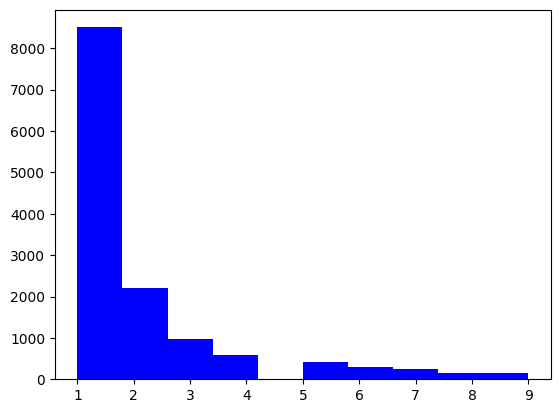

In [25]:
import matplotlib.pyplot as plt
plt.hist([_ for _ in item_cnt_lst if _ < 10 and _ > 0], bins=10, color='blue')
plt.show()

In [ ]:
print(len([i for i in range(1, 140000) if i not in item_cnt])) # 125,483
len(item_cnt.keys()) # 14,516

In [28]:
item_cnt = defaultdict(int)
for i, j in pairs_9:
    item_cnt[i] += 1
    item_cnt[j] += 1
len(item_cnt.keys())

38411

In [13]:
item_cnt = defaultdict(int)
for i, j in pairs_37:
    item_cnt[i] += 1
    item_cnt[j] += 1
len(item_cnt.keys())

3720

In [16]:
item_cnt = defaultdict(int)
for i, j in pairs_28:
    item_cnt[i] += 1
    item_cnt[j] += 1
len(item_cnt.keys())

7502

In [6]:
item_cnt = defaultdict(int)
for i, j in pairs_265:
    item_cnt[i] += 1
    item_cnt[j] += 1
len(item_cnt.keys())

14516

In [25]:
all_items = torch.tensor(list(item_cnt.keys()))

if not 'guide_model_text_embedding' in locals().keys():
    guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.5027

100%|██████████| 14516/14516 [01:45<00:00, 137.15it/s] 


# CDs_and_Vinyl

In [17]:
category = 'CDs_and_Vinyl'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

In [4]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_265, f)

100%|██████████| 70245054/70245054 [00:24<00:00, 2832228.65it/s]

Length of pairs: 32008


In [13]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.7
pairs_27 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_27 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_27.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_27)}")
with open(f'pairs/{category}_27.pkl', 'wb') as f:
    pickle.dump(pairs_27, f)

100%|██████████| 70245054/70245054 [00:23<00:00, 3016591.20it/s]

Length of pairs: 19962


In [7]:
from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_265:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.4426

100%|██████████| 26148/26148 [05:41<00:00, 76.55it/s]  


tensor(0.4426, device='cuda:0')

In [18]:
from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_27:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.4435

100%|██████████| 19546/19546 [03:09<00:00, 102.99it/s] 


tensor(0.4435, device='cuda:0')

# Electronics

In [29]:
category = 'Electronics'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")

with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_265, f)

100%|██████████| 221214226/221214226 [01:09<00:00, 3182753.60it/s]

Length of pairs: 8664


In [20]:
from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_265:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.4709

100%|██████████| 10861/10861 [01:00<00:00, 180.61it/s] 


tensor(0.4709, device='cuda:0')

# Kindle_Store

In [21]:
category = 'Kindle_Store'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

In [22]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")

100%|██████████| 1489476238/1489476238 [08:29<00:00, 2922688.37it/s]

Length of pairs: 2919321


In [23]:
CO_OCCURENCE_THRESHOLD = 0.3
COS_SIM_THRESHOLD = 0.8
pairs_38 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_38 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_38.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_38)}")

100%|██████████| 1489476238/1489476238 [08:00<00:00, 3102919.96it/s]

Length of pairs: 292755


In [24]:
CO_OCCURENCE_THRESHOLD = 0.4
COS_SIM_THRESHOLD = 0.9
pairs_49 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_49 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_49.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_49)}")

with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_49, f)

100%|██████████| 1489476238/1489476238 [08:11<00:00, 3029533.10it/s]

Length of pairs: 26114


In [26]:
CO_OCCURENCE_THRESHOLD = 0.5
COS_SIM_THRESHOLD = 0.9
pairs_59 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_59 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_59.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_59)}")

with open(f'pairs/{category}_59.pkl', 'wb') as f:
    pickle.dump(pairs_59, f)

100%|██████████| 1489476238/1489476238 [08:19<00:00, 2980004.91it/s]

Length of pairs: 15397


In [28]:
from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_59:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.5811

100%|██████████| 16739/16739 [02:37<00:00, 106.55it/s] 


tensor(0.5811, device='cuda:0')

# Clothing_Shoes_and_Jewelry

In [33]:
category = 'Clothing_Shoes_and_Jewelry'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

In [34]:
CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.75
pairs_275 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_275 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_275.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_275)}")

100%|██████████| 379564110/379564110 [02:06<00:00, 3009388.08it/s]

Length of pairs: 17211


In [35]:
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_275, f)

In [36]:
from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_275:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim

100%|██████████| 17976/17976 [02:41<00:00, 111.33it/s] 


tensor(0.5134, device='cuda:0')

# Health_and_Household

In [ ]:
category = 'Health_and_Household'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))


CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")
# 100%|██████████| 151069450/151069450 [01:48<00:00, 1388747.61it/s]
# Length of pairs: 56631


CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.75
pairs_275 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_275 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_275.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_275)}")
# 100%|██████████| 151069450/151069450 [01:35<00:00, 1582510.79it/s]
# Length of pairs: 19236
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_275, f)


from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_275:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.4899

# 100%|██████████| 12953/12953 [01:07<00:00, 190.60it/s] 
# tensor(0.4899, device='cuda:0')

# Movies_and_TV

In [ ]:
category = 'Movies_and_TV'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")
# 100%|██████████| 264980832/264980832 [03:02<00:00, 1449614.89it/s]
# Length of pairs: 89280

CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.8
pairs_28 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_28 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_28.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_28)}")
# 100%|██████████| 264980832/264980832 [03:01<00:00, 1463827.76it/s]
# Length of pairs: 55040

CO_OCCURENCE_THRESHOLD = 0.3
COS_SIM_THRESHOLD = 0.8
pairs_38 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_38 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_38.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_38)}")
# 100%|██████████| 264980832/264980832 [02:46<00:00, 1589757.96it/s]
# Length of pairs: 20212
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_38, f)


from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_38:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.4949

# 100%|██████████| 18196/18196 [02:23<00:00, 126.87it/s] 
# tensor(0.4949, device='cuda:0')

# Pet_Supplies

In [ ]:
category = 'Pet_Supplies'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")
# 0%|          | 0/60342046 [00:00<?, ?it/s]
# 100%|██████████| 60342046/60342046 [00:34<00:00, 1764988.17it/s]
# Length of pairs: 854
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_265, f)

from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_265:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.5004
# 100%|██████████| 7939/7939 [00:28<00:00, 273.94it/s] 
# tensor(0.5004, device='cuda:0')

# Software

In [ ]:
category = 'Software'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

CO_OCCURENCE_THRESHOLD = 0.2
COS_SIM_THRESHOLD = 0.65
pairs_265 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_265 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_265.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_265)}")
#   2%|▏         | 153030/7488958 [00:00<00:04, 1530239.44it/s]
# 100%|██████████| 7488958/7488958 [00:04<00:00, 1521306.30it/s]
# Length of pairs: 4336
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_265, f)


from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_265:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim # 0.4403

# 100%|██████████| 3437/3437 [00:04<00:00, 703.33it/s] 
# tensor(0.4403, device='cuda:0')

# Home_and_Kitchen

In [ ]:
category = 'Home_and_Kitchen'
co_occurrence = load_npz(f'co_occurrence/{category}.npz')
co_occurrence = co_occurrence.tocoo()
sim = pickle.load(open(f'cos_sim_of_co_occurence/{category}.pkl', 'rb'))

CO_OCCURENCE_THRESHOLD = 0.3
COS_SIM_THRESHOLD = 0.9
pairs_39 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_39 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_39.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_39)}")
# 100%|██████████| 520756772/520756772 [06:06<00:00, 1422714.58it/s]
# Length of pairs: 1477

CO_OCCURENCE_THRESHOLD = 0.3
COS_SIM_THRESHOLD = 0.8
pairs_38 = set()
for i in tqdm(range(len(sim))):
    if co_occurrence.data[i] > CO_OCCURENCE_THRESHOLD and sim[i] > COS_SIM_THRESHOLD and \
        (co_occurrence.col[i], co_occurrence.row[i]) not in pairs_38 and \
        (co_occurrence.row[i] != co_occurrence.col[i]):
        pairs_38.add((co_occurrence.row[i], co_occurrence.col[i]))
print(f"Length of pairs: {len(pairs_38)}")
# 54%|█████▎    | 278898748/520756772 [03:13<02:45, 1462273.93it/s]IOStream.flush timed out
# 100%|██████████| 520756772/520756772 [06:55<00:00, 1253529.14it/s]
# Length of pairs: 3357
with open(f'pairs/{category}.pkl', 'wb') as f:
    pickle.dump(pairs_38, f)

from collections import defaultdict
item_cnt = defaultdict(int)
for i, j in pairs_38:
    item_cnt[i] += 1
    item_cnt[j] += 1

all_items = torch.tensor(list(item_cnt.keys()))

guide_model_text_embedding = torch.load(f'guide_model_text_embeddings/{category}.pt')
guide_model_text_embedding = guide_model_text_embedding.cuda()

sim = 0
cnt = 0
for i in tqdm(range(len(all_items))):
    item_i = all_items[i].unsqueeze(-1).cuda()
    emb_i = guide_model_text_embedding(item_i)
    emb_i = torch.nn.functional.normalize(emb_i, p=2, dim=1)
    item_j = all_items[i + 1:]
    for start in range(0, len(item_j), BATCH_SIZE):
        end = min(start + BATCH_SIZE, len(all_items))
        batch_item_j = item_j[start:end].cuda()
        emb_j = guide_model_text_embedding(batch_item_j)
        emb_j = torch.nn.functional.normalize(emb_j, p=2, dim=1)
        sim += (emb_i * emb_j).sum()
        cnt += end - start

avg_sim = sim / cnt
avg_sim
# 100%|██████████| 5178/5178 [00:07<00:00, 677.32it/s] 
# tensor(0.4368, device='cuda:0')